In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Column profilling**

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique Id for a particular route schedule
4. route_type – Transportation type
5. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
6. Carting: Handling system consisting of small vehicles (carts)
7. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
8. source_center - Source ID of trip origin
9. source_name - Source Name of trip origin
10. destination_cente – Destination ID
11. destination_name – Destination Name
12. od_start_time – Trip start time
13. od_end_time – Trip end time
14. start_scan_to_end_scan – Time taken to deliver from source to destination
15. is_cutoff – Unknown field
16. cutoff_factor – Unknown field
17. cutoff_timestamp – Unknown field
18. actual_distance_to_destination – Distance in Kms between source and destination warehouse
19. actual_time – Actual time taken to complete the delivery (Cumulative)
20. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
21. factor – Unknown field
22. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
23. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
24. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
25. segment_factor – Unknown field

**Problem Statement**

Improve quality, efficiency, and profitability of their business versus their competitors.

statistical summary of the data

In [5]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
df.shape #24 columns and 144867 rows 

(144867, 24)

In [7]:
df.isna().sum() # we have missing values in two columns source_name and destination_name

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Taking copy of original dataframe 

In [8]:
df_copy=df.copy()
df_copy

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


Converting datetime data to datetime datatype ("trip_creation_time","od_start_time","od_end_time","cutoff_timestamp")

In [9]:
df["trip_creation_time"]=pd.to_datetime(df["trip_creation_time"])
df["od_start_time"]=pd.to_datetime(df["od_start_time"])
df["od_end_time"]=pd.to_datetime(df["od_end_time"])
df["cutoff_timestamp"]=pd.to_datetime(df["cutoff_timestamp"], format='mixed')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [11]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [12]:
df['trip_uuid'].unique()

array(['trip-153741093647649320', 'trip-153768492602129387',
       'trip-153693976643699843', ..., 'trip-153761584139918815',
       'trip-153718412883843340', 'trip-153746066843555182'],
      shape=(14817,), dtype=object)

In [13]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58.000000,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29.000000,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58.000000,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56.000000,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20.000000,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [14]:
df[df["trip_uuid"]=='trip-153768492602129387']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
10,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,22,2018-09-23 11:05:19,23.194334,38.0,24.0,26.8622,1.583333,38.0,24.0,26.8622,1.583333
11,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,44,2018-09-23 10:27:22,44.045659,76.0,41.0,54.4326,1.853659,37.0,27.0,30.1058,1.370370
12,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,66,2018-09-23 09:45:25,72.849327,117.0,68.0,89.6680,1.720588,41.0,26.0,35.2353,1.576923
13,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,88,2018-09-23 09:21:27,88.076599,141.0,80.0,108.3939,1.762500,23.0,14.0,17.2476,1.642857
14,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,False,100,2018-09-23 08:39:31,100.708423,183.0,95.0,129.3519,1.926316,41.0,15.0,20.9580,2.733333


**LEVEL OF DATA**
<br>
Here each row highlights one segment of the trip. Hence, to understand it we will compress the data here



In [15]:
df["segment_key"]=df["trip_uuid"] + df["source_center"] + df["destination_center"]
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB


**HANDLING MISSING VALUES**

In [16]:
df.isna().sum()/df.shape[0]  # Only two columns source_name and destination_name have very miniscule amount of missing values, hence we can drop them. 

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.002023
destination_center                0.000000
destination_name                  0.001802
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [17]:
df.dropna(subset=["source_name","destination_name"],inplace = True)  
## All the null values are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [18]:
segment_col = ["segment_actual_time","segment_osrm_time","segment_osrm_distance"]

for col in segment_col:
    df[col+"_sum"] = df.groupby("segment_key")[col].cumsum()

df[[col + "_sum" for col in segment_col]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [19]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [20]:
compressed_columns = {'data': 'first', 
                      'trip_creation_time':'first', 
                      'route_schedule_uuid':'first', 
                      'route_type':'first',
                      'trip_uuid':'first', 
                      'source_center':'first', 
                      'source_name':'first', 
                      'destination_center':'last',
                      'destination_name':'last', 
                      'od_start_time':'first', 
                      'od_end_time':'last',
                      'start_scan_to_end_scan':'last', 
                      'actual_distance_to_destination':'last', 
                      'actual_time':'last',
                      'osrm_time':'last', 
                      'osrm_distance': 'last', 
                      'segment_actual_time_sum':'last', 
                      'segment_osrm_time_sum':'last',
                      'segment_osrm_distance_sum':'last'}

df_compressed = df.groupby('segment_key').aggregate(compressed_columns).reset_index()

In [21]:
df_compressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [22]:
df_final = df_compressed.sort_values(by=['segment_key','od_end_time'],ascending = [True,True])
df_final

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [23]:
# Level of detail: each row explains one segment/mini-trip from one trip

df_final['od_total_time']=df_final['od_end_time']-df_final['od_start_time']
df_final.insert(12,'od_total_time_diff',df_final['od_total_time'])

In [24]:
df_final.drop(columns='od_total_time',inplace=True)

In [25]:
df_final['od_total_time_diff']=df_final['od_total_time_diff'].dt.total_seconds()/60

In [26]:
df_final

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.604421,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.505379,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.832388,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.779486,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.638929,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.115193,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.087797,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.174403,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.474007,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [27]:
segment_sorted = df_final.sort_values(by=['trip_uuid','od_end_time'],ascending=[True,True])

In [28]:
segment_sorted[['trip_uuid','od_start_time','od_end_time']]
## now od_start_time and od_end_time are in correct order, now we can get start and end point of entire trip easily

,trip_uuid,od_start_time,od_end_time
1,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469
0,trip-153671041653548748,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744
3,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591
2,trip-153671042288605164,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855
5,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733
...,...,...,...
26217,trip-153861115439069069,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797
26216,trip-153861115439069069,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872
26218,trip-153861115439069069,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682
26221,trip-153861118270144424,2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547


CONVERTING DATA TO TRIP LEVEL

In [29]:
segment_sorted.columns

Index(['segment_key', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'od_start_time',
       'od_end_time', 'od_total_time_diff', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [30]:
trip_dict={'data':'last', 
           'trip_creation_time':'last', 
           'route_schedule_uuid':'last',
           'route_type':'last',
           'trip_uuid':'last', 
           'source_center':'first', 
           'source_name':'first',
           'destination_center':'last', 
           'destination_name':'last',  
           'od_total_time_diff':'sum', 
           'start_scan_to_end_scan':'sum',
           'actual_distance_to_destination':'sum', 
           'actual_time':'sum', 
           'osrm_time':'sum',
           'osrm_distance':'sum', 
           'segment_actual_time_sum':'sum', 
           'segment_osrm_time_sum':'sum',
           'segment_osrm_distance_sum':'sum'
}

In [31]:
trip = segment_sorted.groupby('trip_uuid').agg(trip_dict).reset_index(drop=True)

In [32]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


Cleaning string columns
 1. lowering all the string columns

In [33]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_total_time_diff', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [34]:
trip['source_name']=trip['source_name'].str.lower()

In [35]:
trip['destination_name']=trip.destination_name.str.lower()

In [36]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND000000ACB,gurgaon_bilaspur_hb (haryana),2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,bangalore_nelmngla_h (karnataka),IND160002AAC,chandigarh_mehmdpur_h (punjab),3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [37]:
trip['source_state']=trip['source_name'].apply(lambda x:x.split('(')[1][:-1])

In [39]:
trip['destination_state']=trip['destination_name'].apply(lambda x:x.split('(')[1][:-1])

In [51]:
trip['source_city']=trip['source_name'].apply(lambda x:x.split('(')[0].split('_')[0])
trip['destination_city']=trip['destination_name'].apply(lambda x:x.split('(')[0].split('_')[0])

In [52]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_state,destination_state,source_city,destination_city
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND000000ACB,gurgaon_bilaspur_hb (haryana),2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,madhya pradesh,haryana,bhopal,gurgaon
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,karnataka,karnataka,tumkur,chikblapur
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,bangalore_nelmngla_h (karnataka),IND160002AAC,chandigarh_mehmdpur_h (punjab),3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,karnataka,punjab,bangalore,chandigarh
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,maharashtra,maharashtra,mumbai hub,mumbai
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,karnataka,karnataka,bellary,bellary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,punjab,punjab,chandigarh,chandigarh
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,haryana,haryana,fbd,faridabad
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,uttar pradesh,uttar pradesh,kanpur,kanpur
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,tamil nadu,tamil nadu,tirunelveli,tirunelveli


CREATING NEW TIME RELATED FEATURES

In [56]:
trip['trip_creation_time']

0       2018-09-12 00:00:16.535741
1       2018-09-12 00:00:22.886430
2       2018-09-12 00:00:33.691250
3       2018-09-12 00:01:00.113710
4       2018-09-12 00:02:09.740725
                   ...            
14782   2018-10-03 23:55:56.258533
14783   2018-10-03 23:57:23.863155
14784   2018-10-03 23:57:44.429324
14785   2018-10-03 23:59:14.390954
14786   2018-10-03 23:59:42.701692
Name: trip_creation_time, Length: 14787, dtype: datetime64[ns]

In [58]:
trip['trip_year']=trip['trip_creation_time'].dt.year
trip['trip_month']=trip['trip_creation_time'].dt.month
trip['trip_day']=trip['trip_creation_time'].dt.day
trip['trip_hour']=trip['trip_creation_time'].dt.hour
trip['trip_week']=trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek']=trip['trip_creation_time'].dt.dayofweek

In [59]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_state,destination_state,source_city,destination_city,trip_year,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND000000ACB,gurgaon_bilaspur_hb (haryana),2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,madhya pradesh,haryana,bhopal,gurgaon,2018,9,12,0,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,karnataka,karnataka,tumkur,chikblapur,2018,9,12,0,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,bangalore_nelmngla_h (karnataka),IND160002AAC,chandigarh_mehmdpur_h (punjab),3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,karnataka,punjab,bangalore,chandigarh,2018,9,12,0,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,maharashtra,maharashtra,mumbai hub,mumbai,2018,9,12,0,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,karnataka,karnataka,bellary,bellary,2018,9,12,0,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,punjab,punjab,chandigarh,chandigarh,2018,10,3,23,40,2
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,haryana,haryana,fbd,faridabad,2018,10,3,23,40,2
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,uttar pradesh,uttar pradesh,kanpur,kanpur,2018,10,3,23,40,2
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,tamil nadu,tamil nadu,tirunelveli,tirunelveli,2018,10,3,23,40,2


In [61]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_total_time_diff', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'source_state', 'destination_state',
       'source_city', 'destination_city', 'trip_year', 'trip_month',
       'trip_day', 'trip_hour', 'trip_week', 'trip_dayofweek'],
      dtype='object')

NUMERICAL COLUMNS

In [62]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_total_time_diff              14787 non-null  float64       
 10  start_scan_to_end_scan          14787 non-null  float64       
 11  ac

In [70]:
num_col=['od_total_time_diff','start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum']



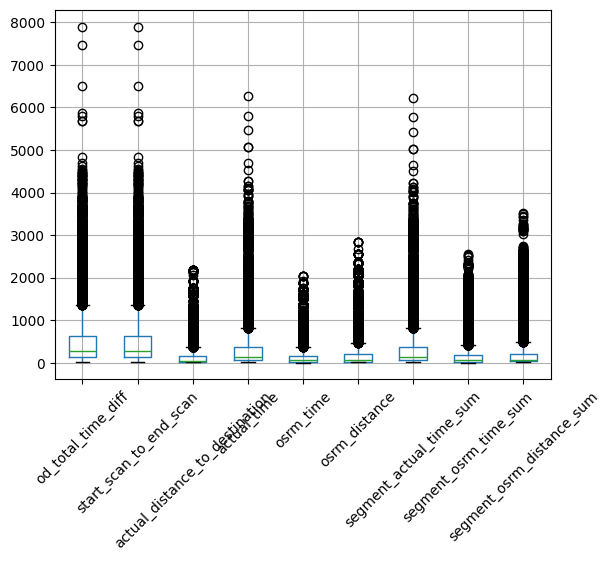

In [76]:
plt.Figure(figsize=(15,15))
trip[num_col].boxplot(rot=45)
plt.show()

HANDLING OUTLIERS

In [79]:
Q1=trip[num_col].quantile(0.25)
Q3=trip[num_col].quantile(0.75)

In [81]:
IQR = Q3 - Q1

IQR

od_total_time_diff                483.839201
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64

In [86]:
## Outliers removed using traditional method
trip = trip[~((trip[num_col] < (Q1 - 1.5*IQR)) | (trip[num_col] > (Q3 + 1.5*IQR))).any(axis=1)]

In [87]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_state,destination_state,source_city,destination_city,trip_year,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,karnataka,karnataka,tumkur,chikblapur,2018,9,12,0,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,maharashtra,maharashtra,mumbai hub,mumbai,2018,9,12,0,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,karnataka,karnataka,bellary,bellary,2018,9,12,0,37,2
5,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,chennai_porur_dpc (tamil nadu),IND602105AAB,chennai_sriperumbudur_dc (tamil nadu),190.487849,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,tamil nadu,tamil nadu,chennai,chennai,2018,9,12,0,37,2
6,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.005634,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,tamil nadu,tamil nadu,chennai,chennai,2018,9,12,0,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,punjab,punjab,chandigarh,chandigarh,2018,10,3,23,40,2
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,haryana,haryana,fbd,faridabad,2018,10,3,23,40,2
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,uttar pradesh,uttar pradesh,kanpur,kanpur,2018,10,3,23,40,2
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,tamil nadu,tamil nadu,tirunelveli,tirunelveli,2018,10,3,23,40,2


In [ ]:
trip = trip.drop(columns=['trip_creation_time'])

In [92]:
trip['route_type'] = trip['route_type'].map({'FTL': 0,'Carting': 1})

In [93]:
trip

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_total_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_state,destination_state,source_city,destination_city,trip_year,trip_month,trip_day,trip_hour,trip_week,trip_dayofweek
1,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,karnataka,karnataka,tumkur,chikblapur,2018,9,12,0,37,2
3,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,maharashtra,maharashtra,mumbai hub,mumbai,2018,9,12,0,37,2
4,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,karnataka,karnataka,bellary,bellary,2018,9,12,0,37,2
5,training,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600116AAB,chennai_porur_dpc (tamil nadu),IND602105AAB,chennai_sriperumbudur_dc (tamil nadu),190.487849,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,tamil nadu,tamil nadu,chennai,chennai,2018,9,12,0,37,2
6,training,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.005634,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,tamil nadu,tamil nadu,chennai,chennai,2018,9,12,0,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,1,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,punjab,punjab,chandigarh,chandigarh,2018,10,3,23,40,2
14783,test,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,1,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,haryana,haryana,fbd,faridabad,2018,10,3,23,40,2
14784,test,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,1,trip-153861106442901555,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,uttar pradesh,uttar pradesh,kanpur,kanpur,2018,10,3,23,40,2
14785,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,1,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,tamil nadu,tamil nadu,tirunelveli,tirunelveli,2018,10,3,23,40,2
